<div class="">
<br><br>
<center><br><font size="7"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Deteksi serangan probe dengan menggunakan data NSL-KDD
<br>
<br><strong>Amartya Bimantara
<br><strong>09011281722041
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

### Modul Yang Digunakan

Modul Yang digunakan yaitu:
1. `numpy dan Pandas ` 

2. `Matplotlib` 

3. `sklearn` 

4. `keras` 

    

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


### Dataset
    
    Data set yang dipakai adalah NSL-KDD. Data ini bisa didapat di kaggle
    Link Dataset nya : 
    
https://www.kaggle.com/hassan06/nslkdd
    
<h3>NSL-KDD dataset</h3>
<ul>
    <li><strong> Jumlah data</strong> : 494021</li>
</ul>

### Serangan probe 

    Untuk sistem jaringan yang mempunyai keamanan canggih dan ketat pun masih memungkinkan sistem jaringan tersebut tak aman seratus persen  dari penyalahgunaan sumber daya atau serangan sistem jaringan para pencuri dunia maya. Terdapat banyak  jenis serangan sistem keamanan jaringan salah satunya adalah serangan probe. Probe merupakan usaha yang tak lazim untuk  memperoleh akses ke dalam suatu sistem/ untuk menemukan informasi tentang sistem tersebut. Dapat dianalogikan sebagai   usaha untuk memasuki sebuah ruangan dengan mencoba-coba apakah pintunya terkunci atau tidak.

### Import Data Set

Dataset diubah menjadi.

    1.kddcup_99_sample.csv   => Deteksi serangan probe

Setelah data diload, selanjutnya drop kolom yang tidak terpakai yaitu "Unnamed: 0"

In [2]:
data = pd.read_csv ("kddcup_99_sample.csv")
data1 = data.drop(columns=["Unnamed: 0"])

Menampilkan head dari data

In [3]:
data1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,799,udp,other,SF,146,105,0,0,0,0,...,1,0.00,0.58,0.96,0.00,0.0,0.0,0.0,0.0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1
2,0,tcp,http,SF,236,2239,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,227,355,0,0,0,0,...,255,1.00,0.00,0.50,0.04,0.0,0.0,0.0,0.0,0
4,4,tcp,smtp,SF,1451,329,0,0,0,0,...,147,0.26,0.09,0.03,0.02,0.0,0.0,0.0,0.0,0


In [4]:
enc = LabelEncoder()
dataset = data1.apply(enc.fit_transform)
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,323,2,2,3,36,26,0,0,0,0,...,1,0,58,96,0,0,0,0,0,0
1,0,1,3,2,0,0,0,0,0,0,...,2,1,7,0,0,77,23,0,0,1
2,0,1,1,3,126,2123,0,0,0,0,...,254,100,1,0,0,0,0,0,0,0
3,0,1,1,3,117,250,0,0,0,0,...,255,100,0,50,4,0,0,0,0,0
4,4,1,4,3,1309,224,0,0,0,0,...,147,26,9,3,2,0,0,0,0,0


### Pemisahan antara Fitur dan Label pada dataset

    Fitur dan Label dipisah supaya mesin bisa mempelajari fitur dari label yang diberikan.


In [5]:
x= np.array(dataset.ix[:, 0:41])
y = np.array(dataset.ix[:, 41])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [6]:
dataset.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
count,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.0,177147.000000,177147.0,177147.000000,...,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000,177147.000000
mean,28.005001,0.821103,1.527528,2.659887,382.648631,930.276070,0.0,0.012464,0.0,0.025544,...,172.887607,70.279632,4.614106,31.543594,1.198502,19.220675,5.749186,3.291752,3.103366,0.521793
std,190.406310,0.551337,1.295959,0.637451,533.925211,2036.956663,0.0,0.152513,0.0,0.223103,...,110.453230,42.993490,13.638116,44.740125,3.491475,33.247630,9.920540,17.061381,16.434442,0.499526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,3.000000,128.000000,0.000000,0.0,0.000000,0.0,0.000000,...,255.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,3.000000,3.000000,890.000000,577.000000,0.0,0.000000,0.0,0.000000,...,255.000000,100.000000,6.000000,100.000000,1.000000,9.000000,2.000000,0.000000,0.000000,1.000000
max,2229.000000,2.000000,4.000000,3.000000,3067.000000,10397.000000,0.0,2.000000,0.0,4.000000,...,255.000000,100.000000,100.000000,100.000000,59.000000,77.000000,23.000000,100.000000,100.000000,1.000000


In [7]:
dataset.shape

(177147, 42)

### Preprocessing dataset.

Dataset yang diambil dengan cara :
    
    1. Scaling: mengubah nilai data menjadi 0 sampai 1
    2. Memotong sinyal sebanyak 42 node/beat. 

In [8]:
normal = dataset[dataset.Label==0]
probe = dataset[dataset.Label==1]

### Splitting Data

Text(0, 0.5, 'Frequency')

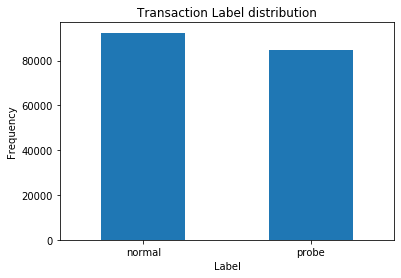

In [9]:
labels = ['normal','probe']
classes = pd.value_counts(data['Label'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency")

In [10]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(x)
feature_scaled.shape

(177147, 41)

In [11]:
print(y)

[0 1 0 ... 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split

#### Data fitur dan label dibagi menjadi data train dan test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

### Model ANN

Menggunakan model Sequential(). Pada Model ini terdapat Input layer , Hidden layer dan Output layer. 

<strong>Penentuan Jumlah Layer ditentukan sebagai berikut </strong>:

    a. Jumlah dari input layer itu sama dengan jumlah fitur yang diberikan kepada mesin.
    b. Jumlah dari Hidden layer ditentukan sesuai dengan atau lebih besar dari Input layer.
    c. Jumlah dari Output Layer sesuai dengan kolom yang diberikan kepada mesin.
  
  
<strong>Jumlah layer yang ditentukan adalah </strong>:

    1. Input layer : Layer pertama terbentuk dari 42 layer Neural sesuai fitur dengan menggunakan activation                                    relu.
    2. Hidden Layer pertama : 42 units Neural Network dengan menggunakan activation relu.
    3. Hidden Layer Kedua : 42 units Neural Network dengan menggunakan activation relu.
    4. Output layer : 1 unit Neural Network dengan menggunakan activation sigmoid.

In [14]:
model = Sequential()
model.add(Dense(units= 100, input_dim =41 , activation='relu'))
model.add(Dense(units= 50, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

### Compile Model

Melakukan compile dengan Optimizer adam dengan fungsi loss Binary Crossentropy. Disini terdapat parameter optimizer adam  yaitu learning_rate.

Learning_rate yaitu seberapa teliti mesin itu belajar. Semakin kecil nilai learning rate ,maka semakin teliti mesin belajar dan semakin tinggi kesempatan untuk mendapatkan hasil yang bagus. Learning rate yang tinggi memiliki kelemahan yaitu, waktu untuk proses training yang lama.

In [15]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Melakukan Training model dengan data train serta Validasi dengan data Test

Model yang sudah dibentuk sesuai dengan **data train** dan menvalidasi proses dengan data validasi yaitu **data testing**. 

Adapula parameter yaitu :

1. `batch_size` : Seberapa banyak sample yang dimasukkan ke dalam Model dalam satu iterasi
2. `epochs`  : Seberapa banyak mesin mengulang pembelajaran sampai nilai weight tidak berubah lagi.

In [16]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=10)

Train on 141717 samples, validate on 35430 samples
Epoch 1/10
141717/141717 [==============================] - 5s 34us/step - loss: 0.1806 - accuracy: 0.9961 - val_loss: 0.0074 - val_accuracy: 0.9995
Epoch 2/10
141717/141717 [==============================] - 5s 32us/step - loss: 0.0255 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 3/10
141717/141717 [==============================] - 5s 32us/step - loss: 0.0085 - accuracy: 0.9996 - val_loss: 0.0047 - val_accuracy: 0.9997
Epoch 4/10
141717/141717 [==============================] - 5s 34us/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 5/10
141717/141717 [==============================] - 5s 32us/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 6/10
141717/141717 [==============================] - 5s 33us/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 7/10
141717/141717 [=============================

### Melakukan Perhitungan Akurasi

In [25]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

35430/35430 [==============================] - 0s 13us/step


[0.0008382228429433551, 0.9997177720069885]

### Evaluasi Model Plot 

1. `Underfitting`

Underfitting terjadi apabila hasil akurasi dari data testing itu **lebih tinggi** daripada data training.

2. `Overfitting` 

Overfitting terjadi apabila hasil akurasi dari data testing itu **lebih rendah** daripada data training.

3. `Fit`

Fit apabila hasil akurasi dari data testing **tidak berbeda jauh** daripada data training.

### Melakukan Plot hasil akurasi training dan akurasi testing

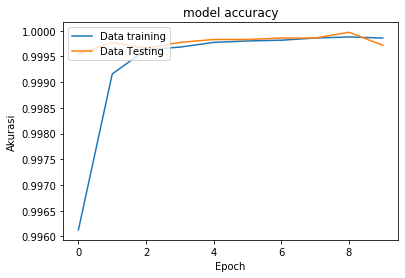

In [26]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

### Melakukan Plot hasil Loss antara training dan testing

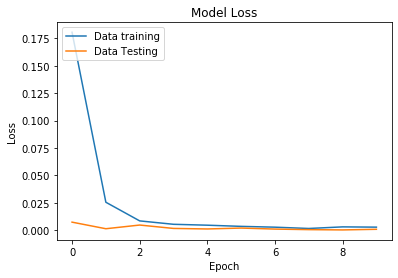

In [27]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

### Confusion Matrix

Confusion Matrix merupakan sebuah tabel yang berisi 2 jenis nilai yaitu Nilai prediksi dan Nilai Dataset(nilai yang benar). Nilai tersebut dipecah menjadi 4 dan akan dibandingkan untuk mendapatkan informasi tentang performa model learning.
    
Jika 0 ( positive ) dan 1 ( negative ).

1. True Positive : Mesin memprediksi positive dan benar
2. True Negative : Mesin memprediksi negative dan benar
3. False Positive : Mesin memprediksi Positive dan padahal negative 
4. False Negative : Mesin memprediksi negative dan padahal positive


In [28]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [29]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[16911     0]
 [   10 18509]]


### Melakukan Evaluasi Model dengan Confusion Matrix

Pada Confusion matrik terdapat banyak penilaian yang bisa diambil untuk mengukur performa dari model learning. Namun yang sering dipakai adalah :

1. Akurasi : Melakukan perbandingan Seberapa banyak model mengklasifikasikan kelas yang benar dengan total kelas yang ada.

Akurasi = (TP+TN)/(TP+TN+FP+FN)

2. Recall : Melihat seberapa akurat mesin untuk mengklasifikasikan kelas yang positif.

Recall = TP/(TP+FN)

3. Presisi : Melakukan perbandingan prediksi kelas yang positif yang benar dengan semua prediksi kelas positif.

Presisi = TP/(TP+FP)
        
4. F1 : Nilai rata-rata dari Recall dan Presisi 
        
F1 = (2*Presisi*recall) / (presisi+recall)

In [30]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [31]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[16911     0]
 [   10 18509]]


In [32]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.9994090183795284
F1 :  0.9997044218491369
sensitivity :  0.9994090183795284
akurasi :  0.9997177533163986


### Referensi

`Dataset` : https://www.kaggle.com/hassan06/nslkdd

`Paper` : Nattawat Khamphakdee, Nunnapus Benjamas, and Saiyan Saiyod "Improving Intrusion Detection System based on Snort rules for network probe attack detection."https://ieeexplore.ieee.org/abstract/document/6914042